In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

df = df.sample(frac=0.1, random_state=10)

df.head()


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
394349,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,Very good one! Better than Samsung S and iphon...,0.0
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41384 entries, 394349 to 109303
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  41384 non-null  object 
 1   Brand Name    34846 non-null  object 
 2   Price         40762 non-null  float64
 3   Rating        41384 non-null  int64  
 4   Reviews       41373 non-null  object 
 5   Review Votes  40194 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.2+ MB


In [12]:
df.dtypes

Product Name     object
Brand Name       object
Price           float64
Rating            int64
Reviews          object
Review Votes    float64
dtype: object

In [14]:
df.describe()

,Price,Rating,Review Votes
count,40762.000000,41384.000000,40194.000000
mean,227.626005,3.815170,1.498109
std,276.992862,1.551391,8.452564
min,1.730000,1.000000,0.000000
25%,79.950000,3.000000,0.000000
50%,140.000000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2408.730000,5.000000,524.000000


In [16]:
df.dropna(inplace=True)
df = df[df['Rating'] != 3]

df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
df.head(10)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0,0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0,1
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0,0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0,1
277158,Nokia N8 Unlocked GSM Touch Screen Phone Featu...,Nokia,95.00,5,I fell in love with this phone because it did ...,0.0,1
100311,Blackberry Torch 2 9810 Unlocked Phone with 1....,BlackBerry,77.49,5,I am pleased with this Blackberry phone! The p...,0.0,1
251669,Motorola Moto E (1st Generation) - Black - 4 G...,Motorola,89.99,5,"Great product, best value for money smartphone...",0.0,1
279878,OtterBox 77-29864 Defender Series Hybrid Case ...,OtterBox,9.99,5,I've bought 3 no problems. Fast delivery.,0.0,1
406017,Verizon HTC Rezound 4G Android Smarphone - 8MP...,HTC,74.99,4,Great phone for the price...,0.0,1
302567,"RCA M1 Unlocked Cell Phone, Dual Sim, 5Mp Came...",RCA,159.99,5,My mom is not good with new technoloy but this...,4.0,1


In [18]:
df['Positively Rated'].mean()

0.7471694429984383

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], 
                                                    df['Positively Rated'], 
                                                    random_state=0)
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 Received garbage its defeated phones


X_train shape:  (23052,)


### CountVectorizer

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_train)

In [26]:
vect.get_feature_names_out()[::2000]

array(['00', 'artifact', 'comfy', 'ea', 'googletalk', 'launching',
       'oneself', 'realizada', 'snap', 'ucpk'], dtype=object)

In [28]:
len(vect.get_feature_names_out())

19533

In [30]:
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<23052x19533 sparse matrix of type '<class 'numpy.int64'>'
	with 613452 stored elements in Compressed Sparse Row format>

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
from sklearn.metrics import roc_auc_score

predictions = model.predict(vect.transform(X_test))

print('test accuracy score: ', roc_auc_score(y_test, predictions))

test accuracy score:  0.8992388736820146


In [40]:
predictions = model.predict(vect.transform(X_train))

print('train accuracy score: ', roc_auc_score(y_train, predictions))

train accuracy score:  0.9547736306796817


In [42]:
feature_names = np.array(vect.get_feature_names_out())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['worst' 'terrible' 'waste' 'slow' 'junk' 'sucks' 'broken' 'useless'
 'disappointed' 'horrible']

Largest Coefs: 
['excelent' 'excelente' 'excellent' 'love' 'perfectly' 'exactly' 'perfect'
 'great' 'loves' 'awesome']


### Visualization

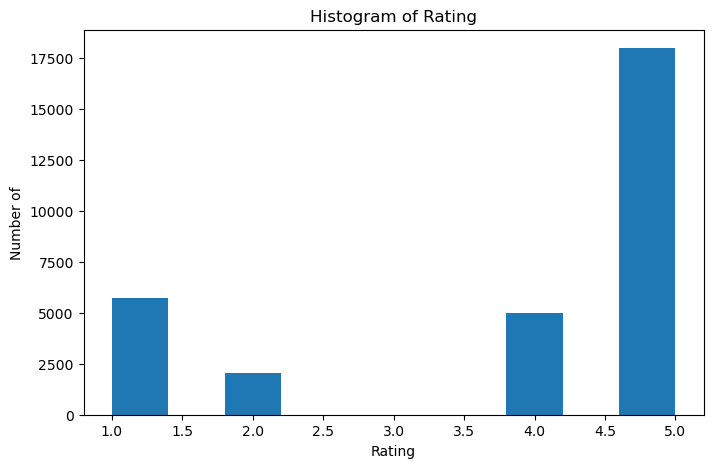

In [44]:
import matplotlib.pyplot as plt
df['Rating'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Rating') # add a title to the histogram
plt.ylabel('Number of') # add y-label
plt.xlabel('Rating') # add x-label

plt.show()

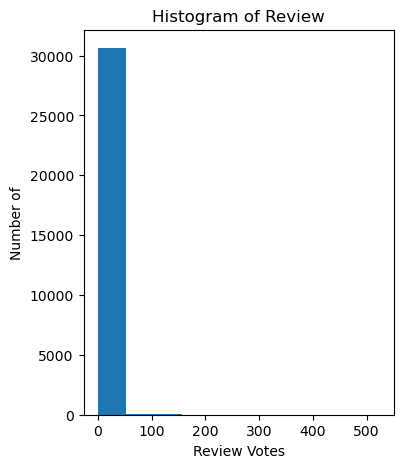

In [47]:
df['Review Votes'].plot(kind='hist', figsize=(4,5 ))

plt.title('Histogram of Review') # add a title to the histogram
plt.ylabel('Number of') # add y-label
plt.xlabel('Review Votes') # add x-label

plt.show()

### Tfidf

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names_out())


5459

In [54]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8902876424559376


In [56]:
feature_names = np.array(vect.get_feature_names_out())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['disabling' '61' 'printer' 'approach' 'adjustment' 'consequences'
 'confident' 'length' 'emailing' 'handsfree']

Largest tfidf: 
['tops' 'fast' 'up' 'ass' 'windows' 'spectacular' 'indestructible' 'pin'
 'fine' 'fire']


In [58]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'slow' 'disappointed' 'return' 'never' 'worst' 'terrible' 'waste'
 'doesn' 'horrible']

Largest Coefs: 
['great' 'love' 'excellent' 'good' 'perfect' 'best' 'awesome' 'far'
 'price' 'perfectly']


In [60]:
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


### n-grams

In [63]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names_out())

29162

In [65]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC:  0.9177931042919907


In [67]:
feature_names = np.array(vect.get_feature_names_out())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['no good' 'junk' 'not good' 'slow' 'poor' 'broken' 'worst' 'terrible'
 'horrible' 'sucks']

Largest Coefs: 
['excellent' 'excelente' 'perfect' 'excelent' 'great' 'love' 'no problems'
 'awesome' 'good' 'not bad']


In [69]:
# These reviews are now correctly identified
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 0]


In [71]:
print(model.predict(vect.transform(['phone is working smoothly , performance is good',
                                    'no issue, phone is working'])))

[1 1]
